# Crime Rates in Boston

Imagine that you have been tasked with exploring the crime rates in different districts in the city of Boston through the police dataset. The specific districts we will be looking at is B2, B3, and D14. Some stats about main communities within these districts are shown below:

**Mattapan and Roxbury (Districts B2 and B3)**
- Median income: $19,362
- Total population: 136,191
- Unemployment rate: 13.6%

**Middlesex (District D14)**
- Median income: $59,435
- Total population: 113,021
- Unemployment rate: 3.4%

The findings for this project will be useful in uncovering certain trends of crime throughout Boston and the communities within it. The informaiton here could determine where certain resources will be distributed within the Boston government for reducing crime. Good luck!

## Jupyter Notebook

First things first, let's get some terminology straight.
- The *language* we're working in – Python 3.7 
- The *editor* we're using is Google Colab – The code runs on Google's servers, and shows the results on our browser
- This file is an interactive Python notebook, a `.ipynb` file. These are pretty special, also known as **Jupyter notebooks**. 

Jupyter notebooks have a few special properties that make it ideal for work with data:
 - Code is organized into cells, which can be **code** or **markdown** 
 - We can run the cells in **any order**, try it out!
 - The last item returned in a cell will print automatically, no need to wrap it with `print()`

In [1]:
x = 'Answer to the Ultimate Question of Life, the Universe, and Everything'

In [2]:
print(x) # Run this cell after running the one above, and again after running the one below

Answer to the Ultimate Question of Life, the Universe, and Everything


In [3]:
x = 42

Anything you can do in Python, you can do here! 

1. Write a function that takes a string as input, and does something to it 
2. In a new cell, call the function and test it out

In [4]:
def UltimateQuestion(computer_name):
    return computer_name + ' is thinking...'

In [5]:
UltimateQuestion('Deep Thought')

'Deep Thought is thinking...'

## Importing packages

We use the `pandas` package to easily work with data as tables.
<br>The `numpy` package allows us to work with some other special data types, like missing values
<br><br>We'll rename these as `pd` and `np`, just so its easier to refer to later on

In [21]:
import pandas as pd
import numpy as np

## Importing data

For this semester, we'll typically work with data in *tabular* format, the type you'd be used to in an excel spreadsheet. Data files saved in this format will usually have a `.csv` file ending, short for comma seperated values.

For example, a CSV file could look something like...

```
tree_number, species_name, address
312, Magnolia grandiflora, 2828 Divisadero St
124, Melaleuca quinquenervia, 485 Union St
912, Pittosporum undulatum, 47 Vicksburg St
```

To import this, let's use the `pd.read_csv()` function:

In [22]:
url = 'https://raw.githubusercontent.com/dt3zjy/node/master/week-1/workshop/boston_crime.csv'
crime = pd.read_csv(url)

Here, we've saved the data to a `dataframe` object named `crimes`

In [23]:
type(crime)

pandas.core.frame.DataFrame

DataFrames contain our data in little "spreadsheet"-like structures. Whatever manipulations you can think of doing to the data, you can likely search how to do 

## Exploring dataframes

Let's take a look at the data. We'll use the function `.head()` to read in the first 5 rows

In [24]:
crime.head()

Unnamed: 0 INCIDENT_NUMBER                    OFFENSE_DESCRIPTION DISTRICT  \
0           0       PLTEST005                 BURGLARY - RESIDENTIAL       B2   
1           1       PLTEST003                   INVESTIGATE PROPERTY       B2   
2           2       PLTEST002                   INVESTIGATE PROPERTY       B2   
3           3       222000599        FRAUD - CREDIT CARD / ATM FRAUD       B2   
4           4       222000583  LARCENY THEFT FROM MV - NON-ACCESSORY       B2   

   SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  \
0         1  2021-10-13 00:00:00  2021     10   Wednesday     0   
1         0  2021-05-12 00:00:00  2021      5   Wednesday     0   
2         0  2021-05-12 00:00:00  2021      5   Wednesday     0   
3         0  2021-12-29 22:40:00  2021     12   Wednesday    22   
4         0  2021-12-28 12:00:00  2021     12     Tuesday    12   

          STREET        Lat       Long  
0  SCHROEDER PLZ  42.333679 -71.091878  
1  SCHROEDER PLZ  42.333679 -71.091878  
2  SCHROEDER PLZ  42.333679 -71.091878  
3  WASHINGTON ST  42.328663 -71.085634  
4  WASHINGTON ST  42.328663 -71.085634

How big is the dataset? `.shape` returns a tuple with the dimensions as (rows, columns)

In [25]:
crime.shape

(21697, 13)

Let's try to understand our data a bit better. 
- How many different crimes are in the dataset? 

In [26]:
crime.OFFENSE_DESCRIPTION.nunique()

107

- Which crime happens the most frequently?

In [29]:
crime.OFFENSE_DESCRIPTION.value_counts()

INVESTIGATE PERSON                            2341
M/V - LEAVING SCENE - PROPERTY DAMAGE         1598
SICK ASSIST                                   1501
INVESTIGATE PROPERTY                          1254
VANDALISM                                      982
                                              ... 
BREAKING AND ENTERING (B&E) MOTOR VEHICLE        2
OPERATING UNDER THE INFLUENCE (OUI) DRUGS        2
AIRCRAFT INCIDENTS                               1
EXPLOSIVES - TURNED IN OR FOUND                  1
FIREARM/WEAPON - ACCIDENTAL INJURY / DEATH       1
Name: OFFENSE_DESCRIPTION, Length: 107, dtype: int64

Show the most recent crime by sorting the dataframe:

In [34]:
crime.sort_values(by='OCCURRED_ON_DATE', ascending=False)

Unnamed: 0 INCIDENT_NUMBER              OFFENSE_DESCRIPTION DISTRICT  \
14             14       222000197     PROPERTY - LOST THEN LOCATED       B3   
23             23       212095530             INVESTIGATE PROPERTY       B2   
17             17       222000005        THREATS TO DO BODILY HARM       B2   
24             24       212095529             ASSAULT - AGGRAVATED       B2   
25             25       212095528                 ASSAULT - SIMPLE       B2   
...           ...             ...                              ...      ...   
18616       18616       212013148  FRAUD - FALSE PRETENSE / SCHEME       B3   
16848       16848       212021001               LARCENY ALL OTHERS       B2   
8568         8568       212058122  FRAUD - FALSE PRETENSE / SCHEME       B2   
14259       14259       212032563  FRAUD - FALSE PRETENSE / SCHEME       B3   
21066       21066       212002295      LARCENY THEFT FROM BUILDING       B2   

       SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  \
14            0  2021-12-31 23:30:00  2021     12      Friday    23   
23            0  2021-12-31 23:21:00  2021     12      Friday    23   
17            0  2021-12-31 22:53:00  2021     12      Friday    22   
24            0  2021-12-31 22:47:00  2021     12      Friday    22   
25            0  2021-12-31 22:45:00  2021     12      Friday    22   
...         ...                  ...   ...    ...         ...   ...   
18616         0  2021-01-01 00:00:00  2021      1      Friday     0   
16848         0  2021-01-01 00:00:00  2021      1      Friday     0   
8568          0  2021-01-01 00:00:00  2021      1      Friday     0   
14259         0  2021-01-01 00:00:00  2021      1      Friday     0   
21066         0  2021-01-01 00:00:00  2021      1      Friday     0   

                                                  STREET        Lat       Long  
14                                             MENTON ST  42.272983 -71.078050  
23                                          HUMBOLDT AVE  42.314303 -71.088566  
17                                         ABBOTSFORD ST  42.314630 -71.092615  
24                                             WARREN ST  42.316966 -71.082541  
25                                       MISSION PARK DR  42.333783 -71.109343  
...                                                  ...        ...        ...  
18616                                      BLUE HILL AVE  42.284826 -71.091374  
16848  ALLERTON ST & MAGAZINE ST\nROXBURY  MA 02119\n...  42.327551 -71.069162  
8568                                       WASHINGTON ST  42.328663 -71.085634  
14259                                      BLUE HILL AVE  42.284826 -71.091374  
21066                                        BILODEAU RD  42.328663 -71.085634  

[21697 rows x 13 columns]

### Subsetting

Subsetting is a super helpful tool. We'll take a look at this more depth in next week, but for now, here are the basics:

We can filter rows from a dataframe based on some condition

- Show crimes that happened on `WASHINGTON ST`

In [14]:
crime[crime.common_name == 'WASHINGTON ST']

tree_id    legal_status caretaker   dbh  plot_size       species_name  \
149      53700  Permitted Site   Private  14.0        NaN  Prunus cerasifera   
198      54020  DPW Maintained   Private  13.0        NaN  Prunus cerasifera   
208      54057  DPW Maintained   Private   8.0        NaN  Prunus cerasifera   
265      54255  Permitted Site   Private  10.0        3x3  Prunus cerasifera   
364     221734  DPW Maintained   Private  12.0  Width 4ft  Prunus cerasifera   
...        ...             ...       ...   ...        ...                ...   
35535    55973  DPW Maintained   Private   3.0        NaN  Prunus cerasifera   
35571   236272  DPW Maintained   Private   3.0  Width 3ft  Prunus cerasifera   
35572   236271  DPW Maintained   Private   3.0  Width 3ft  Prunus cerasifera   
35700   246210  DPW Maintained   Private   3.0  Width 0ft  Prunus cerasifera   
35701   246211  DPW Maintained   Private   3.0  Width 0ft  Prunus cerasifera   

       common_name        date site_location site_type   latitude   longitude  \
149    Cherry Plum  1970-03-04      Sidewalk    Cutout  37.746081 -122.426025   
198    Cherry Plum  1972-04-07      Sidewalk    Cutout  37.772780 -122.494875   
208    Cherry Plum  1972-04-21      Sidewalk    Cutout  37.772551 -122.494860   
265    Cherry Plum  1972-07-03      Sidewalk    Cutout  37.759509 -122.442802   
364    Cherry Plum  1972-08-17      Sidewalk    Cutout  37.765292 -122.452934   
...            ...         ...           ...       ...        ...         ...   
35535  Cherry Plum  2019-06-10      Sidewalk    Cutout  37.791259 -122.432719   
35571  Cherry Plum  2019-07-26      Sidewalk    Cutout  37.766989 -122.416495   
35572  Cherry Plum  2019-07-26      Sidewalk    Cutout  37.767032 -122.416501   
35700  Cherry Plum  2019-10-01      Sidewalk    Cutout  37.767967 -122.443800   
35701  Cherry Plum  2019-10-01      Sidewalk    Cutout  37.767917 -122.443821   

                        address  
149               263 Duncan St  
198                862 35th Ave  
208                874 35th Ave  
265             191 Caselli Ave  
364                 203 Carl St  
...                         ...  
35535           2221 Webster St  
35571            99 Shotwell St  
35572            99 Shotwell St  
35700  725 Buena Vista Ave West  
35701  725 Buena Vista Ave West  

[1180 rows x 13 columns]

How would you show only trees north of Golden Gate Park (latitude > `37.77285`)

Hint: Same way as matching if statements in python, mirroring the syntax above

In [15]:
trees[trees.latitude > 37.77285]

tree_id    legal_status caretaker   dbh  plot_size  \
1        30321  DPW Maintained   Private   2.0        NaN   
5        30339  DPW Maintained   Private  11.0        NaN   
6        30337  DPW Maintained   Private  12.0        NaN   
7        30341  DPW Maintained   Private  10.0        NaN   
20       30418  DPW Maintained   Private  12.0        NaN   
...        ...             ...       ...   ...        ...   
36068   144227  DPW Maintained   Private   0.0  Width 4ft   
36069   144230  DPW Maintained   Private   0.0  Width 4ft   
36070   261517  DPW Maintained   Private   3.0  Width 3ft   
36071   144157  DPW Maintained   Private   0.0  Width 4ft   
36072   144192  DPW Maintained   Private   0.0  Width 4ft   

                  species_name             common_name        date  \
1         Magnolia grandiflora       Southern Magnolia  1956-01-06   
5         Platanus x hispanica  Sycamore: London Plane  1956-02-15   
6         Platanus x hispanica  Sycamore: London Plane  1956-02-15   
7           Acacia melanoxylon        Blackwood Acacia  1956-02-15   
20        Platanus x hispanica  Sycamore: London Plane  1956-03-26   
...                        ...                     ...         ...   
36068          Agonis flexuosa       Peppermint Willow  2020-01-25   
36069  Melaleuca quinquenervia                 Cajeput  2020-01-25   
36070          Agonis flexuosa       Peppermint Willow  2020-01-25   
36071    Tristaniopsis laurina            Swamp Myrtle  2020-01-25   
36072    Lophostemon confertus            Brisbane Box  2020-01-25   

      site_location site_type   latitude   longitude             address  
1          Sidewalk    Cutout  37.795718 -122.441860  2828 Divisadero St  
5          Sidewalk    Cutout  37.793189 -122.441380  2560 Divisadero St  
6          Sidewalk    Cutout  37.793242 -122.441395  2560 Divisadero St  
7          Sidewalk    Cutout  37.805913 -122.437521    3789 Fillmore St  
20         Sidewalk    Cutout  37.797295 -122.440879     2509 Filbert St  
...             ...       ...        ...         ...                 ...  
36068      Sidewalk    Cutout  37.773933 -122.503557        782 43rd Ave  
36069      Sidewalk    Cutout  37.775598 -122.503676        696 43rd Ave  
36070      Sidewalk      Yard  37.775886 -122.501730        679 41st Ave  
36071      Sidewalk    Cutout  37.774642 -122.501452        746 41st Ave  
36072      Sidewalk    Cutout  37.776940 -122.502697        618 42nd Ave  

[15811 rows x 13 columns]

## Data Manipulation

What is the average diameter of the `Evergreen Pear` tree?

In [16]:
trees[trees.common_name == 'Evergreen Pear'].dbh.mean()

5.306595365418895

In [17]:
trees.groupby(by='common_name').agg('mean')['dbh'].sort_values(ascending=False).head(20)

common_name
Date palm (species unknown)          70.000000
False Avocado                        35.000000
Canary Island Date Palm              30.912664
Flooded Box: Coolibah                30.000000
Morton Bay Fig                       29.000000
Douglas Fir                          26.333333
Moraine Ash                          26.000000
Burgundy Sweet Gum                   24.000000
Yucca                                23.000000
Beefwood: Drooping She-Oak           22.666667
Bloodgood London Plane               21.750000
Norfolk Island Pine                  20.333333
Shamel Ash: Evergreen Ash            20.294118
Poplar Spp                           18.000000
Nichol's Willow-Leafed Peppermint    17.387097
Silver Mountain Gum Tree             17.000000
Silk Oak Tree 'Red Hooks'            16.200000
Siberian Elm                         16.105263
Lombardy Poplar                      16.000000
Blue Gum                             15.250000
Name: dbh, dtype: float64

## Visualization

First things first, let's import the package to help us visualize the data, `plotly`.

If this package isn't yet included, we can install it using `!pip install plotly`. More on this week 5. 

In [18]:
import plotly.express as px

Note that we're using the sub package of the broader package, called `plotly express`. This simplifies a lot of the more difficult steps

Plotly express has a broad range of options to play with, let's take a look at the documentation. 
<br>Do a quick google search to pull up documentation for `px.scatter` OR run `px.scatter?` in a Jupyter cell

In [ ]:
px.scatter?

In [20]:
trees_sample = trees.sample(frac=.2)

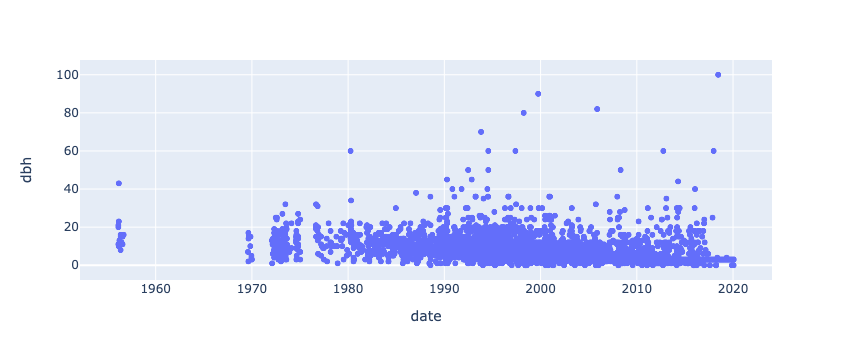

In [21]:
fig = px.scatter(trees_sample, x='date', y='dbh')
fig.show()

Clearly, there aren't any obvious trends going on from this view. Let's add in some more parameters

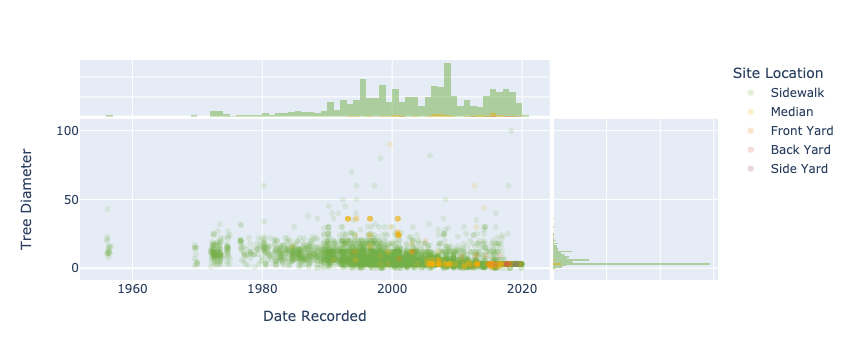

In [22]:
fig = px.scatter(trees_sample, x='date', y='dbh', 
                 opacity=.15, color='site_location', 
                 hover_name='common_name', hover_data=['site_location','site_type','address'],
                 marginal_x = 'histogram', marginal_y = 'histogram',
                 color_discrete_sequence = px.colors.qualitative.Prism[4:],
                 labels={'site_location':'Site Location', 'dbh':'Tree Diameter', 'date':'Date Recorded'}
                )
fig.show()

### Geographic Plots

The transportation department wants to know track any trees sitting on a road median, in order to quickly remove debris after a bad storm. 

- Is there a general area in which there are more roadside / median trees?
- Could you show the address, caretaker, and name of the tree on hover?

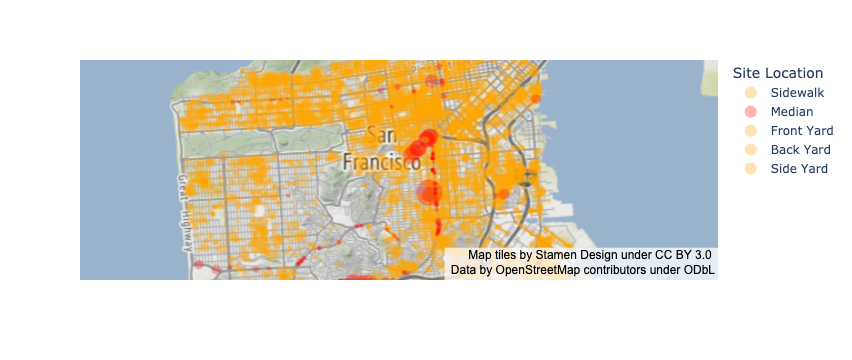

In [23]:
fig = px.scatter_mapbox(trees_sample, lat='latitude', lon='longitude', mapbox_style="stamen-terrain", zoom=11, 
                        color='site_location', size='dbh', opacity=.3,
                        color_discrete_sequence=['orange','red','orange','orange','orange','orange'],
                        hover_name='address',hover_data=['site_location','caretaker'],
                        labels={'site_location':'Site Location', 'dbh':'Tree Diameter', 
                                'date':'Date Recorded', 'caretaker':'Care Taker'}

                       )
fig.show()